# Final Project - Advanced Data Modelling
This code was used to find recurring problems with the company/products or the delivery of Asos and to give improvement recommendation based on what users liked about the app from competitor Zalando SE using web scraping, NLP and sentiment analysis with Long Short- Term Memory Network on Google Play Store reviews of the Asos app.

# Imports

In [ ]:
pip install wordcloud

In [ ]:
pip install gensim

In [3]:
import nltk
from nltk.probability import FreqDist
import pandas as pd

# Import all reviews

In [4]:
all_reviews = pd.read_csv('reviews.csv')
all_reviews.head()

reviewId          userName  \
0  gp:AOqpTOECWgwZjPLvW1dxl94nbEmkNhb7wI81LW9duuz...  Valeria Anguiano   
1  gp:AOqpTOGxAsJGwnh_FuPF2-WIaozOxkJlUNKhjDm9v6R...            Igor T   
2  gp:AOqpTOFhzKoXP4gtMUoYmG7qu2yOLS1Hz7d4rAGbqrS...      Fred Saimpre   
3  gp:AOqpTOF4blkO0yXldS98RYRwxIQimhBuA74zb9S27Rt...          anisaba2   
4  gp:AOqpTOHOM6J9YNXJNyOqS_Qmsot9BiTTjUjXNe69E6D...      anjali rawat   

                                           userImage  \
0  https://play-lh.googleusercontent.com/-lKti1p-...   
1  https://play-lh.googleusercontent.com/a-/AOh14...   
2  https://play-lh.googleusercontent.com/a-/AOh14...   
3  https://play-lh.googleusercontent.com/-tV40baf...   
4  https://play-lh.googleusercontent.com/-gU-xlFq...   

                                             content  score  thumbsUpCount  \
0  Doesn't let me order anything just keeps telli...      1              0   
1  Charged me the money and said they shipped the...      1              0   
2  I used to enjoy shopping on this app. It's unf...      1              2   
3  The quality of their cloths is amazing. Howeve...      1             38   
4  Its all good till you place the order but a co...      1              1   

  reviewCreatedVersion              at replyContent repliedAt sortOrder  \
0               4.46.0  24.03.21 06:44          NaN       NaN    newest   
1               4.46.0  23.03.21 21:12          NaN       NaN    newest   
2               4.46.0  23.03.21 03:50          NaN       NaN    newest   
3               4.46.0  21.03.21 18:21          NaN       NaN    newest   
4               4.45.0  20.03.21 20:30          NaN       NaN    newest   

          appId  
0  com.asos.app  
1  com.asos.app  
2  com.asos.app  
3  com.asos.app  
4  com.asos.app

In [5]:
asos_reviews = all_reviews.loc[all_reviews.appId == 'com.asos.app']
filterted_asos_reviews = asos_reviews[['content', 'score', 'thumbsUpCount', 'replyContent', 'repliedAt']].copy()

zalando_reviews = all_reviews.loc[all_reviews.appId == 'de.zalando.mobile']
filterted_zalando_reviews = zalando_reviews[['content', 'score', 'thumbsUpCount', 'replyContent', 'repliedAt']].copy()

In [6]:
filterted_asos_reviews.head()

content  score  thumbsUpCount  \
0  Doesn't let me order anything just keeps telli...      1              0   
1  Charged me the money and said they shipped the...      1              0   
2  I used to enjoy shopping on this app. It's unf...      1              2   
3  The quality of their cloths is amazing. Howeve...      1             38   
4  Its all good till you place the order but a co...      1              1   

  replyContent repliedAt  
0          NaN       NaN  
1          NaN       NaN  
2          NaN       NaN  
3          NaN       NaN  
4          NaN       NaN

# Descriptive Statistics

In [7]:
filterted_asos_reviews.score.value_counts()

5    200
4    200
2    200
1    200
3    150
Name: score, dtype: int64

In [8]:
len(filterted_asos_reviews.content)

len_s1 = 0
len_s2 = 0
len_s3 = 0
len_s4 = 0
len_s5 = 0

#get average len of reviews per score 
for i in range(0, len(filterted_asos_reviews)):
    if filterted_asos_reviews.iloc[i]['score'] == 1:
        len_s1 += len(filterted_asos_reviews.iloc[i]['content'])
    elif filterted_asos_reviews.iloc[i]['score'] == 2:
        len_s2 += len(filterted_asos_reviews.iloc[i]['content'])
    elif filterted_asos_reviews.iloc[i]['score'] == 3:
        len_s3 += len(filterted_asos_reviews.iloc[i]['content'])
    elif filterted_asos_reviews.iloc[i]['score'] == 4:
        len_s4 += len(filterted_asos_reviews.iloc[i]['content'])
    else:
        len_s5 += len(filterted_asos_reviews.iloc[i]['content'])
        
        
avg_score1 = len_s1/len(filterted_asos_reviews[filterted_asos_reviews['score'] == 1])
avg_score2 = len_s2/len(filterted_asos_reviews[filterted_asos_reviews['score'] == 2])
avg_score3 = len_s3/len(filterted_asos_reviews[filterted_asos_reviews['score'] == 3])
avg_score4 = len_s4/len(filterted_asos_reviews[filterted_asos_reviews['score'] == 4])
avg_score5 = len_s5/len(filterted_asos_reviews[filterted_asos_reviews['score'] == 5])
        
print("Average Length per score per review:")
print("1: ", avg_score1)
print("2: ", avg_score2)
print("3: ", avg_score3)
print("4: ", avg_score4)
print("5: ", avg_score5)

Average Length per score per review:
1:  177.365
2:  177.74
3:  116.08666666666667
4:  85.24
5:  66.93


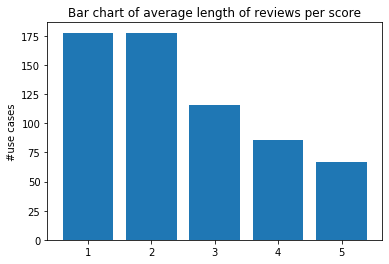

In [9]:
import matplotlib.pyplot as plt
# Data to plot
labels = '1', '2', '3', '4', '5'

sizes = [avg_score1, avg_score2, avg_score3, avg_score4, avg_score5]


# Bar charts are relatively similar. Here we use the bar() function
plt.bar(labels, sizes, align='center')
plt.xticks(labels)
plt.ylabel('#use cases')
plt.title('Bar chart of average length of reviews per score')
plt.show()

In [10]:
# show most 5 most helpful comments
filterted_asos_reviews[filterted_asos_reviews['score'] == 1].sort_values(by='thumbsUpCount', ascending=False)


content  score  thumbsUpCount  \
3    The quality of their cloths is amazing. Howeve...      1             38   
149  App is fine but customer service and access to...      1             28   
35   Worst costumer service experience. The live ch...      1             27   
163  High quality products, easy to use But they do...      1             24   
147  3 orders since november have failed to deliver...      1             23   
..                                                 ...    ...            ...   
77   Not sure what this app was for but I didn't fi...      1              0   
79            customer service is useless at this site      1              0   
80   The models never stand straight, so you can ne...      1              0   
81                                       Too expensive      1              0   
199  Shockingly bad customer service. Tried to set ...      1              0   

    replyContent repliedAt  
3            NaN       NaN  
149          NaN       NaN  
35           NaN       NaN  
163          NaN       NaN  
147          NaN       NaN  
..           ...       ...  
77           NaN       NaN  
79           NaN       NaN  
80           NaN       NaN  
81           NaN       NaN  
199          NaN       NaN  

[200 rows x 5 columns]

In [11]:
filterted_asos_reviews[filterted_asos_reviews['score'] == 2].sort_values(by='thumbsUpCount', ascending=False)


content  score  thumbsUpCount  \
352  Been trying to log in via various socials like...      2             75   
379  when they want you to merrily spend money on g...      2             73   
340  Usual the app is amazing but in the last month...      2             40   
364  Unusable. Every time the phone/tablet screen l...      2             31   
232  The clothes and accessories are gorgeous as us...      2             19   
..                                                 ...    ...            ...   
286  I want products in Indian currency rupees Plea...      2              0   
287  Order came up as confirmed and processing got ...      2              0   
288  Why do items get expired from the fav after co...      2              0   
289  I regularly shop at asos and love it. However,...      2              0   
399  I use to recommend ASOS for its great quality ...      2              0   

                                          replyContent       repliedAt  
352                                                NaN             NaN  
379                                                NaN             NaN  
340  Hi Emily, thanks for bringing this to our atte...  19.12.19 17:19  
364                                                NaN             NaN  
232                                                NaN             NaN  
..                                                 ...             ...  
286                                                NaN             NaN  
287                                                NaN             NaN  
288                                                NaN             NaN  
289                                                NaN             NaN  
399                                                NaN             NaN  

[200 rows x 5 columns]

In [12]:
filterted_asos_reviews[filterted_asos_reviews['score'] == 3].sort_values(by='thumbsUpCount', ascending=False)


content  score  thumbsUpCount  \
478  It's a great app and I really like it, but I d...      3             40   
468  It's a good app, I've used it for years...unti...      3             21   
531  Have always loved ASOS for two reasons, the ne...      3             15   
459  My experience with the delivery was great but ...      3             15   
425  App was fine until 2 days ago, I've opened the...      3             11   
..                                                 ...    ...            ...   
444                     Fit assistance is missing why?      3              0   
443                                          Very good      3              0   
441  The app overall is ok. Unfortunately it is a 3...      3              0   
439  There isn't an option to search based on the f...      3              0   
549  They can't answer back immediately with your e...      3              0   

    replyContent repliedAt  
478          NaN       NaN  
468          NaN       NaN  
531          NaN       NaN  
459          NaN       NaN  
425          NaN       NaN  
..           ...       ...  
444          NaN       NaN  
443          NaN       NaN  
441          NaN       NaN  
439          NaN       NaN  
549          NaN       NaN  

[150 rows x 5 columns]

In [13]:
filterted_asos_reviews[filterted_asos_reviews['score'] == 4].sort_values(by='thumbsUpCount', ascending=False)


content  score  thumbsUpCount  \
687  Great selection of clothes and the birthday co...      4             39   
625  Very usable app design, i like being able to f...      4             36   
611  Very simple app to use. There are so many prod...      4             34   
711  This app is very user friendly on the whole. I...      4             23   
604  great fashion, and so many different brands. M...      4             17   
..                                                 ...    ...            ...   
623                     Problematic on search facility      4              0   
626                Love Asos my new go to for shopping      4              0   
628                                        Easy to use      4              0   
629    Everything works just fine. Never had a problem      4              0   
749           Fast. Like the customer rating inclusion      4              0   

    replyContent repliedAt  
687          NaN       NaN  
625          NaN       NaN  
611          NaN       NaN  
711          NaN       NaN  
604          NaN       NaN  
..           ...       ...  
623          NaN       NaN  
626          NaN       NaN  
628          NaN       NaN  
629          NaN       NaN  
749          NaN       NaN  

[200 rows x 5 columns]

In [14]:
filterted_asos_reviews[filterted_asos_reviews['score'] == 5].sort_values(by='thumbsUpCount', ascending=False)


content  score  thumbsUpCount  \
947  Love ASOS it has a mixture of everything you w...      5             14   
929  Great app, great service. I love ASOS for thei...      5             13   
825  Pretty smooth app. Hasn't crashed on me yet. I...      5              6   
872  Always, quick, clear. The app is easy to use a...      5              2   
837  Ordered many times, great clothes, good prices...      5              2   
..                                                 ...    ...            ...   
818  Amazing deals, great quality. Good structured ...      5              0   
819                                  easy online order      5              0   
820  Love ASOS! Very Addictive! Fast Flowing Easy T...      5              0   
821  Great clothes and prices aren't something to s...      5              0   
949  Love Asos Good variety and selection for us Cu...      5              0   

    replyContent repliedAt  
947          NaN       NaN  
929          NaN       NaN  
825          NaN       NaN  
872          NaN       NaN  
837          NaN       NaN  
..           ...       ...  
818          NaN       NaN  
819          NaN       NaN  
820          NaN       NaN  
821          NaN       NaN  
949          NaN       NaN  

[200 rows x 5 columns]

## Show ratio of reviews and answered reviews

In [15]:
filterted_asos_reviews[filterted_asos_reviews['score'] == 2].count()

content          200
score            200
thumbsUpCount    200
replyContent       1
repliedAt          1
dtype: int64

In [16]:
filterted_asos_reviews.count()

content          950
score            950
thumbsUpCount    950
replyContent      13
repliedAt         13
dtype: int64

In [17]:
filterted_asos_reviews.repliedAt.count()

13

In [18]:
filterted_asos_reviews[filterted_asos_reviews['score'] == 1].count()

content          200
score            200
thumbsUpCount    200
replyContent      10
repliedAt         10
dtype: int64

In [19]:
filterted_asos_reviews[filterted_asos_reviews['score'] == 2].count()

content          200
score            200
thumbsUpCount    200
replyContent       1
repliedAt          1
dtype: int64

In [20]:
filterted_asos_reviews[filterted_asos_reviews['score'] == 3].count()

content          150
score            150
thumbsUpCount    150
replyContent       0
repliedAt          0
dtype: int64

In [21]:
filterted_asos_reviews[filterted_asos_reviews['score'] == 4].count()

content          200
score            200
thumbsUpCount    200
replyContent       1
repliedAt          1
dtype: int64

In [22]:
filterted_asos_reviews[filterted_asos_reviews['score'] == 5].count()

content          200
score            200
thumbsUpCount    200
replyContent       1
repliedAt          1
dtype: int64

### Divide into per score

In [23]:
import math 
def make_one_string(given_list):
    reviews_as_text = ""
    for i in range(0, len(given_list)):
        reviews_as_text += " "
        if given_list.iloc[i]['content'] != "nan":
            reviews_as_text += given_list.iloc[i]['content']
    return reviews_as_text


# Prep Data/Clean Data

## Text Processing

In [24]:
import re
def process_text(reviews_as_text):
    reviews_as_text = re.sub(r"won\'t", "will not",reviews_as_text)  
    reviews_as_text = re.sub(r"can\'t", "can not", reviews_as_text)
    reviews_as_text = re.sub(r"n\'t", " not", reviews_as_text)
    reviews_as_text = re.sub(r"\'re", " are", reviews_as_text)
    reviews_as_text = re.sub(r"\'s", " is", reviews_as_text)
    reviews_as_text = re.sub(r"\'d", " would", reviews_as_text)
    reviews_as_text = re.sub(r"\'ll", " will", reviews_as_text)
    reviews_as_text = re.sub(r"\'t", " not", reviews_as_text)
    reviews_as_text = re.sub(r"\'ve", " have", reviews_as_text)
    reviews_as_text = re.sub(r"\'m", " am", reviews_as_text)
    return reviews_as_text



## Tokenization

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

def tokenize(given_reviews):
    reviews_tokens = word_tokenize(given_reviews)
    lowercase_tokens = [token.lower() for token in reviews_tokens]
    return lowercase_tokens


## Take out Stopwords

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

# remove stopwords, punctuation and digits. the set( ... ) syntax removes duplicates

def remove_stopwords(given_text_tokens):
    remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits))
    filtered_text = [word 
                 for word in given_text_tokens 
                 if not word in remove_these]
    return filtered_text


# Prep Data for Frequency Distr + WordCloud

### Do Data Processing for all 5 scores:

In [27]:
score_1 = filterted_asos_reviews[filterted_asos_reviews['score'] == 1]
score_2 = filterted_asos_reviews[filterted_asos_reviews['score'] == 2]
score_3 = filterted_asos_reviews[filterted_asos_reviews['score'] == 3]
score_4 = filterted_asos_reviews[filterted_asos_reviews['score'] == 4]
score_5 = filterted_asos_reviews[filterted_asos_reviews['score'] == 5]

score_5.head()

content  score  thumbsUpCount  \
750  I love using this app. Very easy to search and...      5              0   
751                        Easy to use, lots of choice      5              0   
752                                        Top stuff 👏      5              0   
753                                 Easy to complete 😁      5              0   
754                                       Werkt prima!      5              0   

    replyContent repliedAt  
750          NaN       NaN  
751          NaN       NaN  
752          NaN       NaN  
753          NaN       NaN  
754          NaN       NaN

### Zalando

In [28]:
filterted_zalando_reviews

content  score  thumbsUpCount  \
950   I set Zlando zero because he sends the bills m...      1              0   
951                                              Sucker      1              0   
952   Non mi permette di pagare. Ho provato a svuota...      1              0   
953   I have cancelled my order to reoder the size d...      1              0   
954                                You charged me twice      1              0   
...                                                 ...    ...            ...   
1876                                Very nice to access      5              0   
1877                       Super great app , works fast      5              0   
1878                                         Very goood      5              0   
1879                                         Super god!      5              0   
1880  Its a very good experience with this app. The ...      5              0   

     replyContent repliedAt  
950           NaN       NaN  
951           NaN       NaN  
952           NaN       NaN  
953           NaN       NaN  
954           NaN       NaN  
...           ...       ...  
1876          NaN       NaN  
1877          NaN       NaN  
1878          NaN       NaN  
1879          NaN       NaN  
1880          NaN       NaN  

[931 rows x 5 columns]

In [29]:
import numpy as np
filterted_zalando_reviews['content'].replace('', np.nan, inplace=True)
filterted_zalando_reviews.dropna(subset=['content'], inplace=True)
print(filterted_zalando_reviews)

                                                content  score  thumbsUpCount  \
950   I set Zlando zero because he sends the bills m...      1              0   
951                                              Sucker      1              0   
952   Non mi permette di pagare. Ho provato a svuota...      1              0   
953   I have cancelled my order to reoder the size d...      1              0   
954                                You charged me twice      1              0   
...                                                 ...    ...            ...   
1876                                Very nice to access      5              0   
1877                       Super great app , works fast      5              0   
1878                                         Very goood      5              0   
1879                                         Super god!      5              0   
1880  Its a very good experience with this app. The ...      5              0   

     replyContent repliedAt

In [30]:
def get_frequencies(dataset, single_word):
    reviews_as_text = make_one_string(dataset)
    reviews_as_text = process_text(reviews_as_text)
    filter_text = filter_words(reviews_as_text)
    if single_word: 
        return filter_text
    else:
        return reviews_as_text


def filter_words(reviews_as_text):
    lowercase_tokens = tokenize(reviews_as_text)
    filtered_text = remove_stopwords(lowercase_tokens)
    return filtered_text

In [31]:
fdist_score_1 = get_frequencies(score_1, True)
fdist_score_2 = get_frequencies(score_2, True)
fdist_score_3 = get_frequencies(score_3, True)
fdist_score_4 = get_frequencies(score_4, True)
fdist_score_5 = get_frequencies(score_5, True)

### Zalando

In [32]:
score_1_zala = filterted_zalando_reviews[filterted_zalando_reviews['score'] == 1]
score_2_zala = filterted_zalando_reviews[filterted_zalando_reviews['score'] == 2]
score_3_zala = filterted_zalando_reviews[filterted_zalando_reviews['score'] == 3]
score_4_zala = filterted_zalando_reviews[filterted_zalando_reviews['score'] == 4]
score_5_zala = filterted_zalando_reviews[filterted_zalando_reviews['score'] == 5]

fdist_score_1_z = get_frequencies(score_1_zala, True)
fdist_score_2_z = get_frequencies(score_2_zala, True)
fdist_score_3_z = get_frequencies(score_3_zala, True)
fdist_score_4_z = get_frequencies(score_4_zala, True)
fdist_score_5_z = get_frequencies(score_5_zala, True)

## Bigrams

In [33]:
get_frequencies(score_2, True)

['decided',
 'stop',
 'buying',
 'permanently',
 'lot',
 'products',
 'wrong',
 'sizes',
 'cover',
 'return',
 'shipping',
 'costs',
 '...',
 'eu',
 'uk',
 'sizes',
 'r',
 'super',
 'different',
 'even',
 'u',
 'use',
 'chart',
 'converter',
 'also',
 'noticed',
 'really',
 'post',
 'negative',
 'reviews',
 'ca',
 'buy',
 'clothing',
 '...',
 'always',
 'says',
 'deliver',
 'country',
 'sure',
 'going',
 'anyone',
 'else',
 'recently',
 'app',
 'keeps',
 'coming',
 "'no",
 'internet',
 'connection',
 'open',
 'delete',
 'app',
 'reload',
 'great',
 'editing',
 'starts',
 'disappointed',
 'app',
 'every',
 'single',
 'time',
 'go',
 'check',
 'tell',
 'items',
 'picked',
 'delivered',
 'uae',
 'display',
 'waste',
 'time',
 'used',
 'beautiful',
 'app',
 'say',
 'unfortunately',
 'like',
 'clothes',
 'costumer',
 'service',
 'worst',
 'ever',
 'met',
 'waiting',
 '40',
 'minutes',
 'response',
 'started',
 'look',
 'things',
 'asked',
 'cut',
 'disrespectful',
 'need',
 'ageing',
 'spen

In [34]:
import nltk
from nltk.corpus import wordnet as wn

# find 20 most frequent bigrams
bigrams_score1 = [b for b in nltk.bigrams(get_frequencies(score_1, True))]
freq_bigrams1 = nltk.FreqDist(bigrams_score1)
print(freq_bigrams1.most_common(20))
# print the top 20 most common bigrams and get

[(('customer', 'service'), 30), (('customer', 'care'), 9), (('even', 'though'), 5), (('account', 'blocked'), 5), (('customer', 'support'), 4), (('10', 'days'), 4), (('never', 'buy'), 4), (('email', 'saying'), 3), (('shopping', 'app'), 3), (('gon', 'na'), 3), (('app', 'fine'), 3), (('canada', 'post'), 3), (('delivery', 'customer'), 3), (('live', 'chat'), 3), (('get', 'money'), 3), (('money', 'back'), 3), (('next', 'day'), 3), (('discount', 'codes'), 3), (('worst', 'customer'), 3), (('free', 'shipping'), 3)]


### Zalando

In [35]:
bigrams_score1_z = [b for b in nltk.bigrams(get_frequencies(score_1_zala, True))]
freq_bigrams1_z = nltk.FreqDist(bigrams_score1_z)

bigrams_score2_z = [b for b in nltk.bigrams(get_frequencies(score_2_zala, True))]
freq_bigrams2_z = nltk.FreqDist(bigrams_score2_z)

bigrams_score3_z = [b for b in nltk.bigrams(get_frequencies(score_3_zala, True))]
freq_bigrams3_z = nltk.FreqDist(bigrams_score3_z)

bigrams_score4_z = [b for b in nltk.bigrams(get_frequencies(score_4_zala, True))]
freq_bigrams4_z = nltk.FreqDist(bigrams_score4_z)

bigrams_score5_z = [b for b in nltk.bigrams(get_frequencies(score_5_zala, True))]
freq_bigrams5_z = nltk.FreqDist(bigrams_score5_z)

In [36]:
bigrams_score2 = [b for b in nltk.bigrams(get_frequencies(score_2, True))]
freq_bigrams2 = nltk.FreqDist(bigrams_score2)
print(freq_bigrams2.most_common(20))

[(('customer', 'service'), 14), (('next', 'day'), 7), (('even', 'though'), 6), (('first', 'time'), 6), (('delivery', 'service'), 5), (('day', 'delivery'), 5), (('love', 'asos'), 4), (('premier', 'delivery'), 4), (('promo', 'codes'), 4), (('app', 'keeps'), 3), (('waste', 'time'), 3), (('keeps', 'saying'), 3), (('...', '...'), 3), (('free', 'shipping'), 3), (('promo', 'code'), 3), (('wrong', 'size'), 3), (('downloaded', 'app'), 3), (('could', 'get'), 3), (('live', 'chat'), 3), (('sent', 'email'), 3)]


In [37]:
bigrams_score3 = [b for b in nltk.bigrams(get_frequencies(score_3, True))]
freq_bigrams3 = nltk.FreqDist(bigrams_score3)
print(freq_bigrams3.most_common(20))

[(('good', 'app'), 6), (('easy', 'use'), 4), (('asos', 'design'), 3), (('even', 'though'), 3), (('really', 'like'), 3), (('plus', 'size'), 3), (('little', 'bit'), 2), (('customer', 'service'), 2), (('delivery', 'service'), 2), (('love', 'asos'), 2), (('last', 'order'), 2), (('order', 'sent'), 2), (('app', 'takes'), 2), (('also', 'helpful'), 2), (('days', 'ago'), 2), (('love', 'app'), 2), (('app', '...'), 2), (('app', 'good'), 2), (('incorrect', 'items'), 2), (('first', 'time'), 2)]


In [38]:
bigrams_score4 = [b for b in nltk.bigrams(get_frequencies(score_4, True))]
freq_bigrams4 = nltk.FreqDist(bigrams_score4)
print(freq_bigrams4.most_common(20))

[(('easy', 'use'), 26), (('good', 'app'), 7), (('easy', 'navigate'), 7), (('great', 'app'), 6), (('user', 'friendly'), 6), (('use', 'app'), 6), (('good', 'service'), 5), (('pretty', 'good'), 4), (('good', 'easy'), 4), (('app', 'easy'), 4), (('app', 'great'), 4), (('great', 'service'), 3), (('love', 'app'), 3), (('app', 'good'), 3), (('back', 'stock'), 3), (('love', 'asos'), 3), (('next', 'day'), 3), (('app', 'works'), 3), (('would', 'also'), 3), (('app', 'user'), 3)]


In [39]:
bigrams_score5 = [b for b in nltk.bigrams(get_frequencies(score_5, True))]
freq_bigrams5 = nltk.FreqDist(bigrams_score5)
print(freq_bigrams5.most_common(20))

[(('easy', 'use'), 40), (('app', 'easy'), 14), (('love', 'asos'), 14), (('great', 'app'), 11), (('quick', 'easy'), 7), (('love', 'app'), 7), (('easy', 'order'), 7), (('use', 'app'), 7), (('easy', 'navigate'), 6), (('using', 'app'), 5), (('shopping', 'experience'), 5), (('use', 'great'), 5), (('great', 'quality'), 5), (('user', 'friendly'), 5), (('app', 'great'), 5), (('fast', 'delivery'), 4), (('lots', 'choice'), 3), (('best', 'app'), 3), (('easy', 'returns'), 3), (('day', 'delivery'), 3)]


In [40]:
bigram_overview = []
  
def get_freq_bigrams(freq_bigrams, given_bigram, score, already_in):
    for i in range(0, len(given_bigram)):
        if given_bigram[i][1]>=5:
            freq_bigrams.append(given_bigram[i][0])
            
            if given_bigram[i][0] in already_in:
                tupel_words = {'words' : (given_bigram[i][0]),
                            'score_occurrence' : [0,0,0,0,0],
                            'total_occurrence' : 0
                           }
            
            tupel_words['score_occurrence'][score-1] += given_bigram[i][1] 
            
            bigram_overview.append(tupel_words)
    return freq_bigrams

In [41]:
def get_freq_bigrams(freq_bigrams, given_bigram):
    for i in range(0, len(given_bigram)):
        if given_bigram[i][1]>5:
            freq_bigrams.append(given_bigram[i][0])
    return freq_bigrams

In [42]:
all_bigrams = []
all_bigrams = get_freq_bigrams(all_bigrams, freq_bigrams1.most_common(20))
all_bigrams = get_freq_bigrams(all_bigrams, freq_bigrams2.most_common(20))
all_bigrams = get_freq_bigrams(all_bigrams, freq_bigrams3.most_common(20))
all_bigrams = get_freq_bigrams(all_bigrams, freq_bigrams4.most_common(20))
all_bigrams = get_freq_bigrams(all_bigrams, freq_bigrams5.most_common(20))


In [43]:
s = set(all_bigrams)
bigrams = list(s)

In [44]:
print(bigrams)

[('customer', 'care'), ('easy', 'use'), ('app', 'easy'), ('easy', 'navigate'), ('good', 'app'), ('use', 'app'), ('first', 'time'), ('user', 'friendly'), ('love', 'app'), ('customer', 'service'), ('love', 'asos'), ('easy', 'order'), ('even', 'though'), ('quick', 'easy'), ('great', 'app'), ('next', 'day')]


In [45]:
len(bigrams)

16

In [46]:
biagrams_scores = []
for i in range(0, len(bigrams)):
    biagrams_scores.append({ 'words' : bigrams[i],
                            'score_distribution' : [0,0,0,0,0],
                            'average_score' : 0,
                            'occurence' : 0
                           })

In [47]:
def get_reviews_scores_bigr (given_bigrams, given_freq, score):
    for i in range(0, len(given_bigrams)):
        j = 0
        occurence = 0
        for j in range(0, len(given_freq)):
            current_freq = given_freq[j]
            tupel_list = [word for word in given_bigrams[i]['words']]
            if current_freq[0] == given_bigrams[i]['words']:
                given_bigrams[i]['score_distribution'][score-1] += current_freq[1]
    
    return given_bigrams

In [48]:
biagrams_scores = get_reviews_scores_bigr(biagrams_scores, freq_bigrams1.most_common(20), 1)
biagrams_scores = get_reviews_scores_bigr(biagrams_scores, freq_bigrams2.most_common(20), 2)
biagrams_scores = get_reviews_scores_bigr(biagrams_scores, freq_bigrams3.most_common(20), 3)
biagrams_scores = get_reviews_scores_bigr(biagrams_scores, freq_bigrams4.most_common(20), 4)
biagrams_scores = get_reviews_scores_bigr(biagrams_scores, freq_bigrams5.most_common(20), 5)


In [49]:
biagrams_scores

[{'words': ('customer', 'care'),
  'score_distribution': [9, 0, 0, 0, 0],
  'average_score': 0,
  'occurence': 0},
 {'words': ('easy', 'use'),
  'score_distribution': [0, 0, 4, 26, 40],
  'average_score': 0,
  'occurence': 0},
 {'words': ('app', 'easy'),
  'score_distribution': [0, 0, 0, 4, 14],
  'average_score': 0,
  'occurence': 0},
 {'words': ('easy', 'navigate'),
  'score_distribution': [0, 0, 0, 7, 6],
  'average_score': 0,
  'occurence': 0},
 {'words': ('good', 'app'),
  'score_distribution': [0, 0, 6, 7, 0],
  'average_score': 0,
  'occurence': 0},
 {'words': ('use', 'app'),
  'score_distribution': [0, 0, 0, 6, 7],
  'average_score': 0,
  'occurence': 0},
 {'words': ('first', 'time'),
  'score_distribution': [0, 6, 2, 0, 0],
  'average_score': 0,
  'occurence': 0},
 {'words': ('user', 'friendly'),
  'score_distribution': [0, 0, 0, 6, 5],
  'average_score': 0,
  'occurence': 0},
 {'words': ('love', 'app'),
  'score_distribution': [0, 0, 2, 3, 7],
  'average_score': 0,
  'occuren

In [50]:
for i in range(0, len(biagrams_scores)):
    occurence = 0
    total = 0
    for j in range(0, len(biagrams_scores[i]['score_distribution'])):
        total += biagrams_scores[i]['score_distribution'][j] * (j+1)
        occurence += biagrams_scores[i]['score_distribution'][j]        
    biagrams_scores[i]['average_score'] = total/occurence
    biagrams_scores[i]['occurence'] = occurence


In [51]:
biagrams_scores

[{'words': ('customer', 'care'),
  'score_distribution': [9, 0, 0, 0, 0],
  'average_score': 1.0,
  'occurence': 9},
 {'words': ('easy', 'use'),
  'score_distribution': [0, 0, 4, 26, 40],
  'average_score': 4.514285714285714,
  'occurence': 70},
 {'words': ('app', 'easy'),
  'score_distribution': [0, 0, 0, 4, 14],
  'average_score': 4.777777777777778,
  'occurence': 18},
 {'words': ('easy', 'navigate'),
  'score_distribution': [0, 0, 0, 7, 6],
  'average_score': 4.461538461538462,
  'occurence': 13},
 {'words': ('good', 'app'),
  'score_distribution': [0, 0, 6, 7, 0],
  'average_score': 3.5384615384615383,
  'occurence': 13},
 {'words': ('use', 'app'),
  'score_distribution': [0, 0, 0, 6, 7],
  'average_score': 4.538461538461538,
  'occurence': 13},
 {'words': ('first', 'time'),
  'score_distribution': [0, 6, 2, 0, 0],
  'average_score': 2.25,
  'occurence': 8},
 {'words': ('user', 'friendly'),
  'score_distribution': [0, 0, 0, 6, 5],
  'average_score': 4.454545454545454,
  'occurence'

In [52]:
singular_words = []
word_connections = {}


for i in range(0, len(bigrams)):
    singular_words.append(bigrams[i][0])
    singular_words.append(bigrams[i][1])

    if bigrams[i][0] in word_connections:
        if bigrams[i][1] not in word_connections[bigrams[i][0]]:
            word_connections[bigrams[i][0]].append(bigrams[i][1])
    else:
        word_connections[bigrams[i][0]] = [bigrams[i][1]]
        
    if bigrams[i][1] in word_connections:
        if bigrams[i][0] not in word_connections[bigrams[i][1]]:
            word_connections[bigrams[i][1]].append(bigrams[i][0])
    else:
        word_connections[bigrams[i][1]] = [bigrams[i][0]]
    
    

### Zalando 

In [53]:
all_bigrams_z = []
all_bigrams_z = get_freq_bigrams(all_bigrams_z, freq_bigrams1_z.most_common(20))
all_bigrams_z = get_freq_bigrams(all_bigrams_z, freq_bigrams2_z.most_common(20))
all_bigrams_z = get_freq_bigrams(all_bigrams_z, freq_bigrams3_z.most_common(20))
all_bigrams_z = get_freq_bigrams(all_bigrams_z, freq_bigrams4_z.most_common(20))
all_bigrams_z = get_freq_bigrams(all_bigrams_z, freq_bigrams5_z.most_common(20))

s_z = set(all_bigrams_z)
bigrams_z = list(s_z)

biagrams_scores_z = []
for i in range(0, len(bigrams_z)):
    biagrams_scores_z.append({ 'words' : bigrams_z[i],
                            'score_distribution' : [0,0,0,0,0],
                            'average_score' : 0,
                            'occurence' : 0
                           })
    
    
biagrams_scores_z = get_reviews_scores_bigr(biagrams_scores_z, freq_bigrams1_z.most_common(20), 1)
biagrams_scores_z = get_reviews_scores_bigr(biagrams_scores_z, freq_bigrams2_z.most_common(20), 2)
biagrams_scores_z = get_reviews_scores_bigr(biagrams_scores_z, freq_bigrams3_z.most_common(20), 3)
biagrams_scores_z = get_reviews_scores_bigr(biagrams_scores_z, freq_bigrams4_z.most_common(20), 4)
biagrams_scores_z = get_reviews_scores_bigr(biagrams_scores_z, freq_bigrams5_z.most_common(20), 5)

for i in range(0, len(biagrams_scores_z)):
    occurence = 0
    total = 0
    for j in range(0, len(biagrams_scores_z[i]['score_distribution'])):
        total += biagrams_scores_z[i]['score_distribution'][j] * (j+1)
        occurence += biagrams_scores_z[i]['score_distribution'][j]        
    biagrams_scores_z[i]['average_score'] = total/occurence
    biagrams_scores_z[i]['occurence'] = occurence

    
    
# Get Word Connections:
singular_words_z = []
word_connections_z = {}


for i in range(0, len(bigrams_z)):
    singular_words_z.append(bigrams_z[i][0])
    singular_words_z.append(bigrams_z[i][1])
    
    if bigrams_z[i][0] in word_connections_z:
        if bigrams_z[i][1] not in word_connections_z[bigrams_z[i][0]]:
            word_connections_z[bigrams_z[i][0]].append(bigrams_z[i][1])
    else:
        word_connections_z[bigrams_z[i][0]] = [bigrams_z[i][1]]
        
    if bigrams_z[i][1] in word_connections_z:
        if bigrams_z[i][0] not in word_connections_z[bigrams_z[i][1]]:
            word_connections_z[bigrams_z[i][1]].append(bigrams_z[i][0])
    else:
        word_connections_z[bigrams_z[i][1]] = [bigrams_z[i][0]]
    
word_connections_z

{'easy': ['use'],
 'use': ['easy'],
 'open': ['app'],
 'app': ['open', 'good', 'love', 'great'],
 'english': ['language'],
 'language': ['english', 'change'],
 'good': ['app'],
 '...': ['...'],
 'fast': ['delivery'],
 'delivery': ['fast'],
 'love': ['app'],
 'change': ['language'],
 'customer': ['service'],
 'service': ['customer'],
 'great': ['app']}

In [54]:
biagrams_scores_z

[{'words': ('easy', 'use'),
  'score_distribution': [0, 0, 0, 13, 8],
  'average_score': 4.380952380952381,
  'occurence': 21},
 {'words': ('open', 'app'),
  'score_distribution': [6, 0, 0, 0, 0],
  'average_score': 1.0,
  'occurence': 6},
 {'words': ('english', 'language'),
  'score_distribution': [0, 6, 3, 0, 0],
  'average_score': 2.3333333333333335,
  'occurence': 9},
 {'words': ('good', 'app'),
  'score_distribution': [0, 3, 4, 7, 3],
  'average_score': 3.588235294117647,
  'occurence': 17},
 {'words': ('...', '...'),
  'score_distribution': [0, 0, 0, 0, 30],
  'average_score': 5.0,
  'occurence': 30},
 {'words': ('fast', 'delivery'),
  'score_distribution': [0, 0, 3, 0, 7],
  'average_score': 4.4,
  'occurence': 10},
 {'words': ('love', 'app'),
  'score_distribution': [0, 0, 0, 9, 6],
  'average_score': 4.4,
  'occurence': 15},
 {'words': ('change', 'language'),
  'score_distribution': [9, 5, 4, 0, 0],
  'average_score': 1.7222222222222223,
  'occurence': 18},
 {'words': ('custom

In [55]:
word_connections

{'customer': ['care', 'service'],
 'care': ['customer'],
 'easy': ['use', 'app', 'navigate', 'order', 'quick'],
 'use': ['easy', 'app'],
 'app': ['easy', 'good', 'use', 'love', 'great'],
 'navigate': ['easy'],
 'good': ['app'],
 'first': ['time'],
 'time': ['first'],
 'user': ['friendly'],
 'friendly': ['user'],
 'love': ['app', 'asos'],
 'service': ['customer'],
 'asos': ['love'],
 'order': ['easy'],
 'even': ['though'],
 'though': ['even'],
 'quick': ['easy'],
 'great': ['app'],
 'next': ['day'],
 'day': ['next']}

In [56]:
bigrams

[('customer', 'care'),
 ('easy', 'use'),
 ('app', 'easy'),
 ('easy', 'navigate'),
 ('good', 'app'),
 ('use', 'app'),
 ('first', 'time'),
 ('user', 'friendly'),
 ('love', 'app'),
 ('customer', 'service'),
 ('love', 'asos'),
 ('easy', 'order'),
 ('even', 'though'),
 ('quick', 'easy'),
 ('great', 'app'),
 ('next', 'day')]

## Word Connections

In [57]:
singular_words = []
for i in range(0, len(bigrams)):
    for j in range (0, 2):
        singular_words.append(bigrams[i][j])

In [58]:
singular_words

['customer',
 'care',
 'easy',
 'use',
 'app',
 'easy',
 'easy',
 'navigate',
 'good',
 'app',
 'use',
 'app',
 'first',
 'time',
 'user',
 'friendly',
 'love',
 'app',
 'customer',
 'service',
 'love',
 'asos',
 'easy',
 'order',
 'even',
 'though',
 'quick',
 'easy',
 'great',
 'app',
 'next',
 'day']

In [59]:
len(singular_words)

32

In [60]:
s = set(singular_words)
singular_words = list(s)

In [61]:
len(singular_words)

21

In [62]:
singular_words


['easy',
 'service',
 'customer',
 'love',
 'quick',
 'though',
 'app',
 'first',
 'great',
 'good',
 'navigate',
 'order',
 'day',
 'even',
 'care',
 'use',
 'time',
 'next',
 'friendly',
 'asos',
 'user']

# Visualize Frequency Distributions

In [63]:
def fdist_graph(fdist_filtered):
    print(fdist_filtered.most_common(30))
    fdist_filtered.plot(30,title='Frequency distribution (excluding stopwords and punctuation)')


In [64]:
fdist_filtered_s1 = FreqDist(fdist_score_1)
fdist_filtered_s2 = FreqDist(fdist_score_2)
fdist_filtered_s3 = FreqDist(fdist_score_3)
fdist_filtered_s4 = FreqDist(fdist_score_4)
fdist_filtered_s5 = FreqDist(fdist_score_5)

[('app', 60), ('order', 53), ('customer', 53), ('asos', 48), ('service', 41), ('get', 37), ('never', 36), ('delivery', 29), ('items', 27), ('...', 25), ('refund', 24), ('money', 20), ('shipping', 20), ('days', 20), ('item', 19), ('even', 18), ('time', 18), ('buy', 17), ('company', 17), ('would', 15), ('return', 15), ('back', 15), ('account', 15), ('told', 15), ('still', 15), ('products', 15), ('email', 14), ('received', 13), ('issue', 13), ('product', 13)]


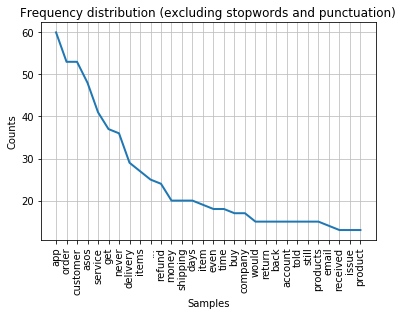

In [65]:
fdist_graph(fdist_filtered_s1)

[('app', 70), ('order', 46), ('delivery', 45), ('asos', 44), ('items', 40), ('time', 36), ('...', 31), ('get', 28), ('service', 25), ('ordered', 25), ('even', 22), ('like', 22), ('customer', 20), ('use', 19), ('would', 19), ('really', 18), ('great', 18), ('good', 17), ('discount', 16), ('size', 16), ('work', 16), ('stock', 14), ('products', 13), ('shipping', 13), ('please', 13), ('find', 13), ('shop', 13), ('day', 12), ('email', 12), ('love', 12)]


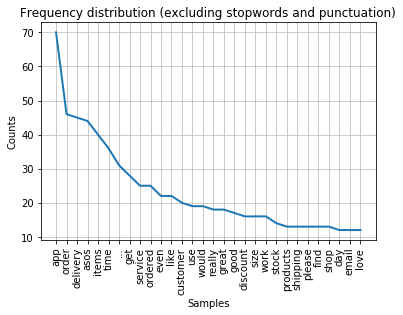

In [66]:
fdist_graph(fdist_filtered_s2)

[('app', 38), ('good', 27), ('asos', 22), ('items', 22), ('order', 21), ('great', 14), ('would', 14), ('product', 13), ('like', 12), ('really', 12), ('time', 11), ('...', 11), ('size', 10), ('use', 10), ('easy', 10), ('delivery', 10), ('stock', 10), ('clothes', 9), ('service', 8), ('got', 8), ('clothing', 8), ('website', 8), ('item', 8), ('always', 8), ('back', 8), ('nice', 7), ('love', 7), ('however', 7), ('get', 7), ('see', 7)]


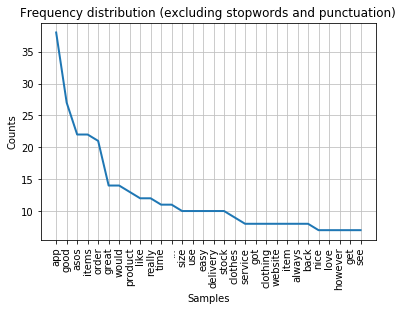

In [67]:
fdist_graph(fdist_filtered_s3)

[('app', 65), ('easy', 60), ('good', 52), ('great', 50), ('use', 31), ('love', 21), ('items', 20), ('would', 18), ('like', 17), ('delivery', 16), ('always', 15), ('asos', 15), ('service', 14), ('shopping', 14), ('stock', 14), ('clothes', 13), ('products', 12), ('really', 12), ('get', 11), ('size', 11), ('sometimes', 9), ('options', 9), ('also', 9), ('simple', 9), ('navigate', 9), ('nice', 9), ('range', 8), ('many', 8), ('experience', 8), ('order', 8)]


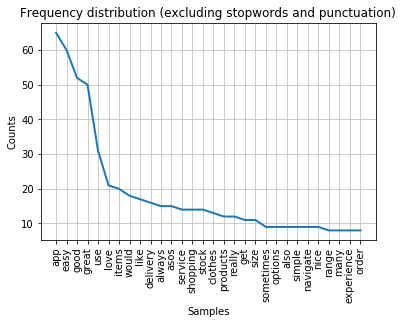

In [68]:
fdist_graph(fdist_filtered_s4)

[('easy', 79), ('app', 66), ('great', 63), ('love', 50), ('use', 48), ('asos', 35), ('good', 23), ('best', 20), ('always', 18), ('shopping', 17), ('experience', 16), ('delivery', 16), ('items', 13), ('fast', 12), ('clothes', 12), ('choice', 11), ('amazing', 11), ('quick', 11), ('also', 10), ('shop', 10), ('never', 10), ('using', 9), ('find', 9), ('size', 9), ('order', 9), ('quality', 9), ('service', 9), ('simple', 8), ('products', 8), ('navigate', 8)]


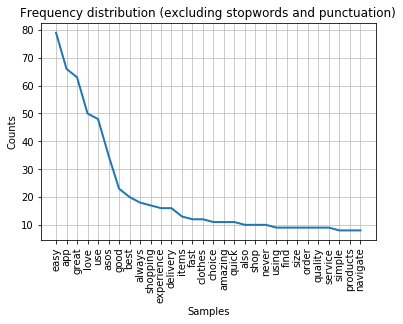

In [69]:
fdist_graph(fdist_filtered_s5)

# WordCloud

In [70]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def make_wordCloud(given_fdist):
    cloud = WordCloud(max_font_size=100,background_color='white', colormap = 'Spectral').generate_from_frequencies(given_fdist)
    plt.figure(figsize=(20,20))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [71]:
def get_sample_reviews(given_words, score_dataset):
    for i in range(0, len(given_words)):
        j = 0
        word_found = False
        print("-----------------------Sample Review for ", given_words[i], "-----------------------")
        while not word_found:
            current_review = score_dataset.iloc[j]['content']
            if given_words[i][0] in current_review:
                word_found = True
                print(score_dataset.iloc[j]['content'])
            else:
                j +=1

### Score 1 WordCloud

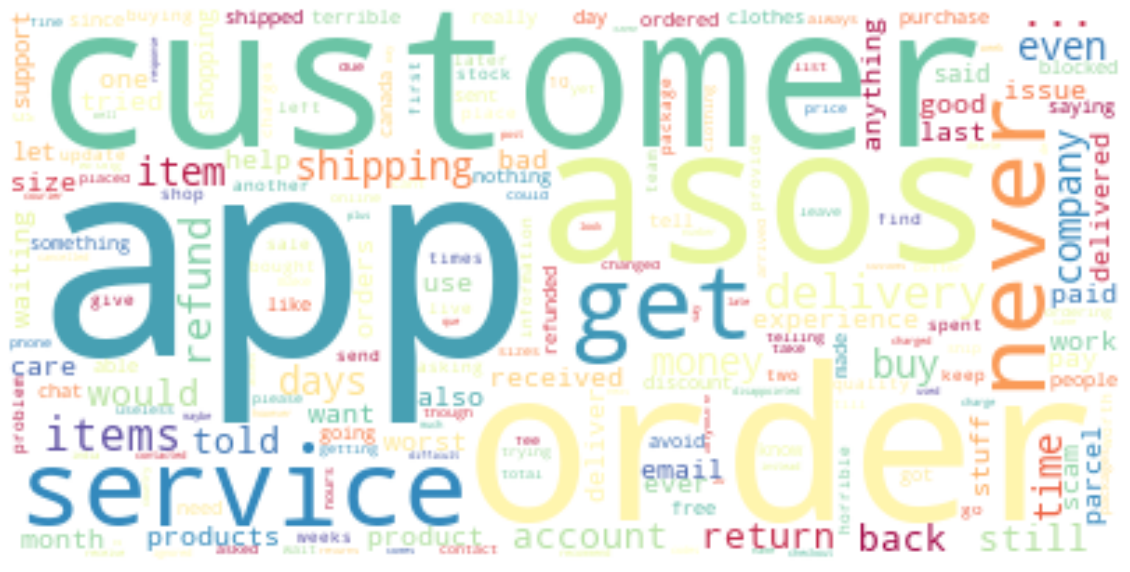

In [72]:
make_wordCloud(fdist_filtered_s1)


### Score 1 - Sample Reviews

In [73]:
get_sample_reviews(fdist_filtered_s1.most_common(3), score_1)

-----------------------Sample Review for  ('app', 60) -----------------------
I used to enjoy shopping on this app. It's unfortunate I'm gonna have to delete this app. You take our money as fast as you can when we order something. However, you take forever to give us our refunds we return something and also, we have to print our own labels now. I'm only waiting on my my money so I can delete this app. I'm going back to the stores now. I can try them on before I buy anything and I can get my refund as soon as I return them. I spent thousands of dollars on this app....
-----------------------Sample Review for  ('order', 53) -----------------------
Doesn't let me order anything just keeps telling me order was successful and I immediately get another email saying order unsuccessful
-----------------------Sample Review for  ('customer', 53) -----------------------
Its all good till you place the order but a complete disaster when it comes to dealing with customer support. I have not receive

### Score 2 WordCloud

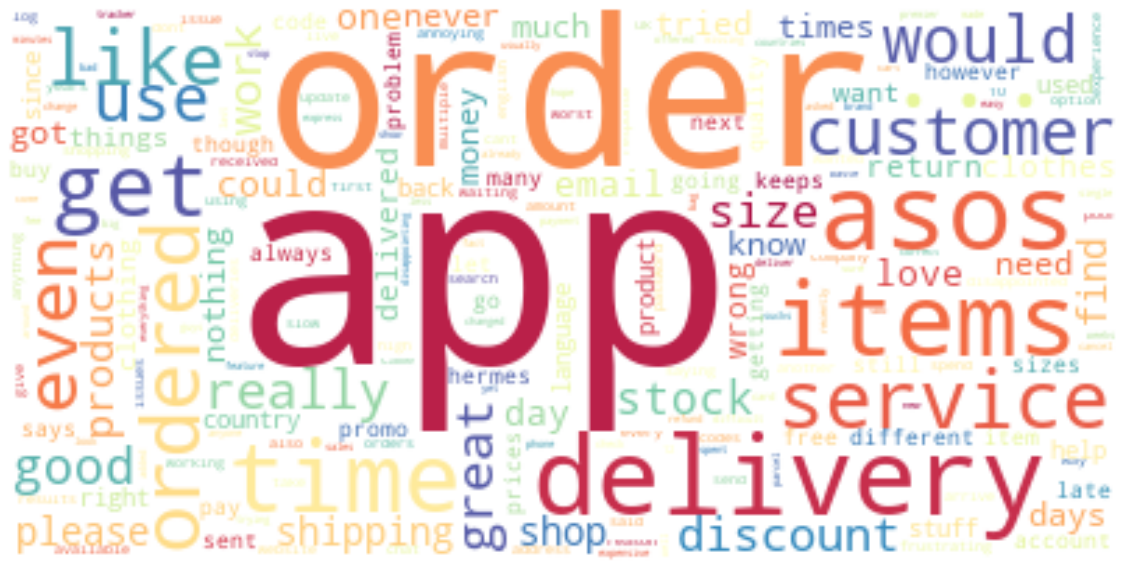

In [74]:
make_wordCloud(fdist_filtered_s2)

### Score 2 - Sample Reviews

In [75]:
get_sample_reviews(fdist_filtered_s2.most_common(3), score_2)

-----------------------Sample Review for  ('app', 70) -----------------------
Not sure what is going on or if anyone else has had this but recently app keeps coming up 'no Internet connection'. It then won't open and I have to delete the app and reload. Up until now it's been great!
-----------------------Sample Review for  ('order', 46) -----------------------
Asos brand is good brand but i payed and ordered 12 products of asos,but i received only 11products.1 item is missed.i tried to get refund and claim.sent many emails.but i didnt been approved for my refund. It deserve 4 star for rate.but because of this reason,only this rating.
-----------------------Sample Review for  ('delivery', 45) -----------------------
Don't waste your money on Premier delivery, it rarely turns up the next day and the customer services do the absolute bare minimum to help.


In [76]:
fdist_filtered_s2.most_common(3)

[('app', 70), ('order', 46), ('delivery', 45)]

In [77]:
get_sample_reviews([('refund', 70), ('return', 46), ('shipping', 45)], score_1)

-----------------------Sample Review for  ('refund', 70) -----------------------
Charged me the money and said they shipped the items, two weeks later issued me a refund, making me lose 15 gbp because of currency fluctuations, their support is a joke, Eleazar kept giving me contradictory answers avoiding all my questions. Would not recomend, total scam
-----------------------Sample Review for  ('return', 46) -----------------------
I used to enjoy shopping on this app. It's unfortunate I'm gonna have to delete this app. You take our money as fast as you can when we order something. However, you take forever to give us our refunds we return something and also, we have to print our own labels now. I'm only waiting on my my money so I can delete this app. I'm going back to the stores now. I can try them on before I buy anything and I can get my refund as soon as I return them. I spent thousands of dollars on this app....
-----------------------Sample Review for  ('shipping', 45) ---------

### Score 3 WordCloud

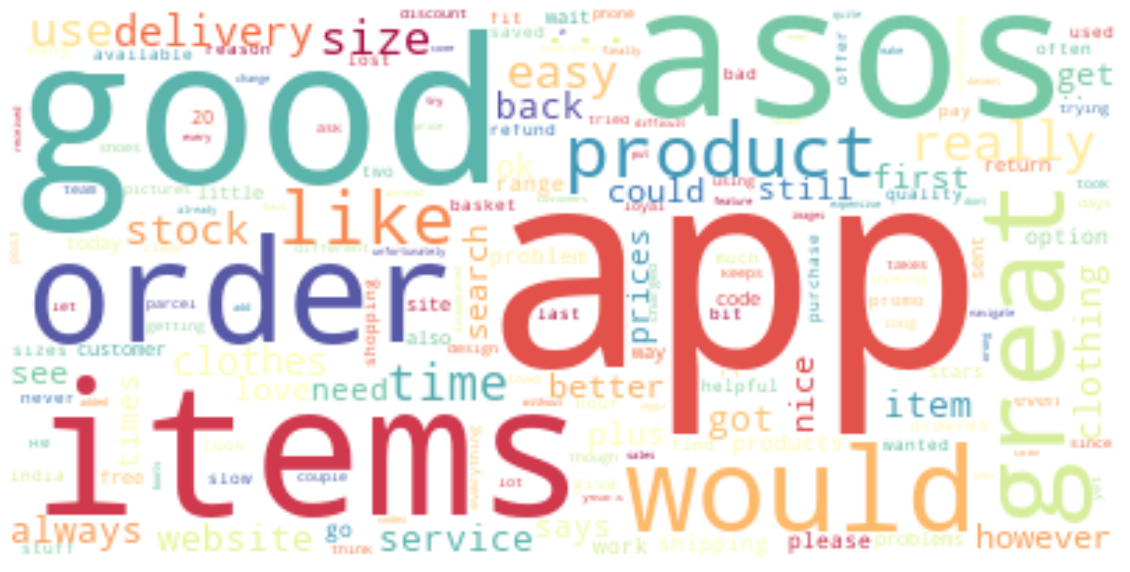

In [78]:
make_wordCloud(fdist_filtered_s3)

### Score 3 - Sample Reviews

In [79]:
get_sample_reviews(fdist_filtered_s3.most_common(3), score_3)

-----------------------Sample Review for  ('app', 38) -----------------------
Easy. The reference to 'Outlet' is confusing as is a reference to discount on dresses but then the one I chose was not eligible, disappointing.
-----------------------Sample Review for  ('good', 27) -----------------------
Igot the unisex ecru hoody I'm a uk12 and a S fitted me a little baggy , the way I like it soft lovely sweatshirt 10/10 , but reason I never gave a 5* is the pink hoody I got was stiff material , still good for the £
-----------------------Sample Review for  ('asos', 22) -----------------------
Always found stuff i like on asos, however they really need to work on reducing their plastic packaging


### Score 4 WordCloud

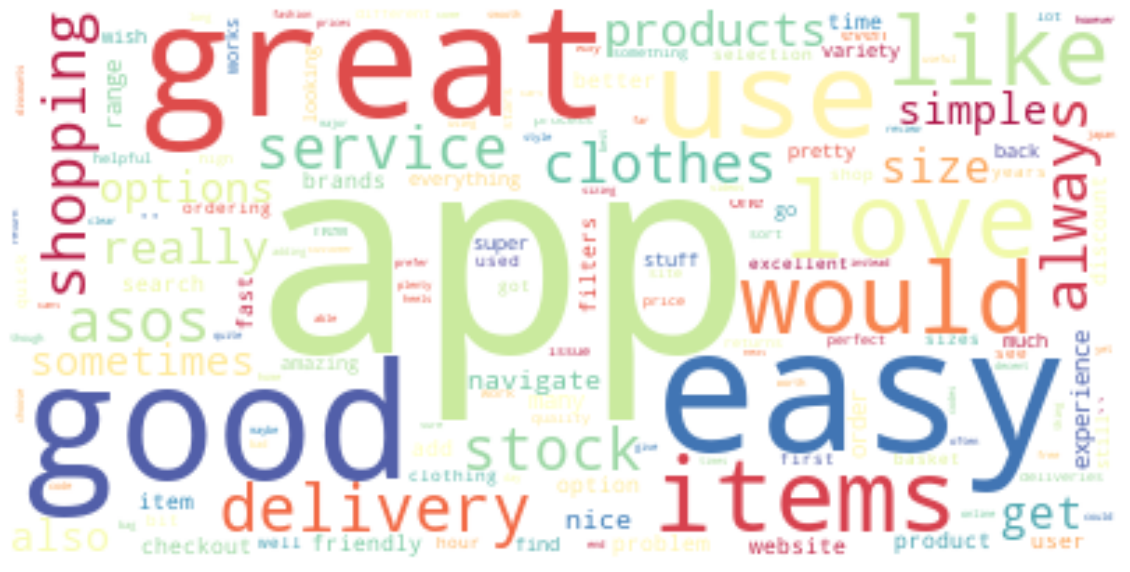

In [80]:
make_wordCloud(fdist_filtered_s4)

### Score 4 - Sample Reviews

In [81]:
get_sample_reviews(fdist_filtered_s4.most_common(3), score_4)

-----------------------Sample Review for  ('app', 65) -----------------------
I've been an ASOS user for years, the app is pretty good I don't notice much of a difference between the app and using ASOS on a web browser. If I had to nitpick I'd complain that even though ASOS graciously offers promo and discount codes quite often, Japan is almost always excluded from these codes for some reason. (Most of them work here in Australia but if I get my girlfriend something in Japan I always get excited for a discount until I insert code and realise Japan is excluded as usual).
-----------------------Sample Review for  ('easy', 60) -----------------------
App is super intuitive, super easy to search for products & checkout easy!
-----------------------Sample Review for  ('good', 52) -----------------------
Pretty good


### Score 5 WordCloud

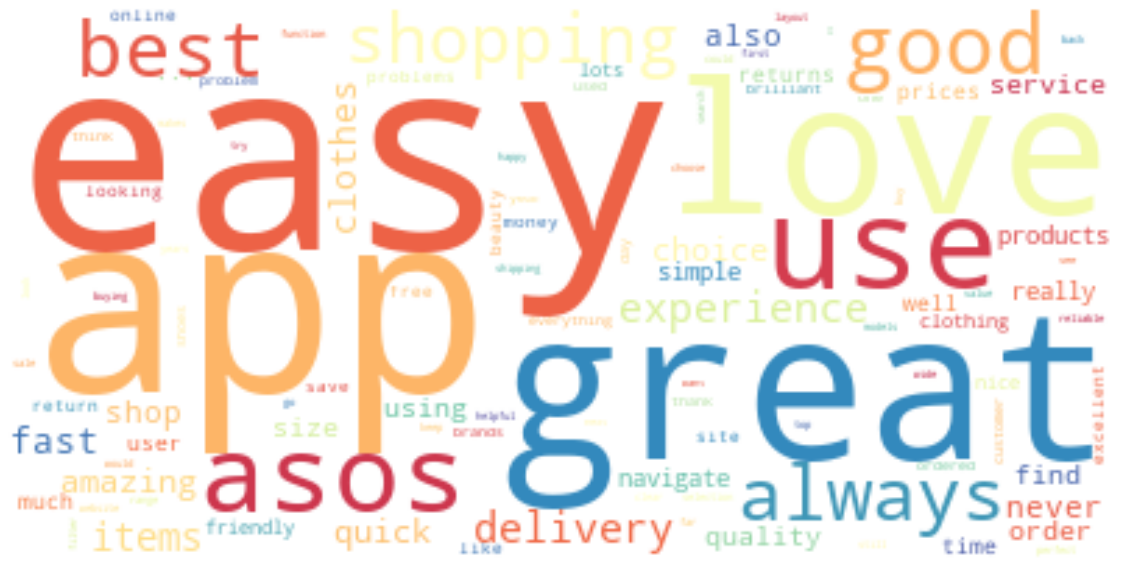

In [82]:
make_wordCloud(fdist_filtered_s5)

### Score 5 - Sample Reviews

In [83]:
get_sample_reviews(fdist_filtered_s5.most_common(3), score_5)

-----------------------Sample Review for  ('easy', 79) -----------------------
I love using this app. Very easy to search and filter. Being tall I love the range available.
-----------------------Sample Review for  ('app', 66) -----------------------
I love using this app. Very easy to search and filter. Being tall I love the range available.
-----------------------Sample Review for  ('great', 63) -----------------------
Easy to use and some great functions with size assistant where you enter your measurements and it recommends the best size for you and also a search function which you can choose an image and it will find similar items for sale. Also easy return process through the app.


## Scores per Frequent Word

In [84]:
#Get most frequent words:
all_frequencies = []

for i in range(0, len(fdist_filtered_s1.most_common(30))):
    if fdist_filtered_s1.most_common(30)[i][1] > 10:
        all_frequencies.append(fdist_filtered_s1.most_common(30)[i][0])
    
for i in range(0, len(fdist_filtered_s2.most_common(30))):
    if fdist_filtered_s2.most_common(30)[i][1] > 10:
        all_frequencies.append(fdist_filtered_s2.most_common(30)[i][0])

for i in range(0, len(fdist_filtered_s3.most_common(30))):
    if fdist_filtered_s3.most_common(30)[i][1] > 10:
        all_frequencies.append(fdist_filtered_s3.most_common(30)[i][0])

for i in range(0, len(fdist_filtered_s4.most_common(30))):
    if fdist_filtered_s4.most_common(30)[i][1] > 10:
        all_frequencies.append(fdist_filtered_s4.most_common(30)[i][0]) 
                           
for i in range(0, len(fdist_filtered_s5.most_common(30))):
    if fdist_filtered_s5.most_common(30)[i][1] > 10:
        all_frequencies.append(fdist_filtered_s5.most_common(30)[i][0])                           
    
one_time = set(all_frequencies)
print(one_time)
print(len(one_time))


{'like', 'days', 'service', 'told', 'customer', 'received', 'shop', 'easy', 'clothes', 'always', '...', 'fast', 'find', 'love', 'amazing', 'return', 'quick', 'app', 'buy', 'company', 'work', 'get', 'great', 'stock', 'good', 'refund', 'delivery', 'really', 'order', 'still', 'day', 'even', 'product', 'email', 'use', 'items', 'best', 'time', 'discount', 'experience', 'shipping', 'shopping', 'money', 'back', 'would', 'products', 'account', 'size', 'ordered', 'please', 'never', 'asos', 'item', 'choice', 'issue'}
55


In [85]:
one_time.remove('...')
#remove verbs
one_time.remove('find')
one_time.remove('would')
one_time.remove('use')
one_time.remove('buy')
one_time.remove('get')

#remove unnecassray adjectives:
one_time.remove('even')
one_time.remove('please')
one_time.remove('always')
one_time.remove('really')
one_time.remove('back')
one_time.remove('choice')

#others not necessary:
one_time.remove('asos')
one_time.remove('still')


In [86]:
topics = { 'account',
 'app',
 'clothes',
 'delivery',
 'discount',
 'email',
 'experience',
 'item',
 'money',
 'order',
 'product',
 'received',
 'refund',
 'return',
 'service',
 'shipping',
 'shop',
 'size',
 'stock',
 'time'}


good_ones = { 'amazing',
 'best',
 'easy',
 'fast',
 'good',
 'great',
 'love',
 'quick'}

problems = { 'work',
  'issue'  
}

In [87]:
main_topics = [{ 'words' : ['account'],
                            'score_distribution' : [0,0,0,0,0],
                            'average_score' : 0,
                            'occurence' : 0
                           },
               { 'words' : ['app'],
                            'score_distribution' : [0,0,0,0,0],
                            'average_score' : 0,
                            'occurence' : 0
                           },
               { 'words' : ['clothes', 'item' , 'items', 'product', 'products', 'size', 'stock'],
                            'score_distribution' : [0,0,0,0,0],
                            'average_score' : 0,
                            'occurence' : 0
                           },
               { 'words' : ['delivery', 'shipping'],
                            'score_distribution' : [0,0,0,0,0],
                            'average_score' : 0,
                            'occurence' : 0
                           },
               { 'words' : ['email'],
                            'score_distribution' : [0,0,0,0,0],
                            'average_score' : 0,
                            'occurence' : 0
                           },
               { 'words' : ['order'],
                            'score_distribution' : [0,0,0,0,0],
                            'average_score' : 0
                           },
               { 'words' : ['refund', 'return'],
                            'score_distribution' : [0,0,0,0,0],
                            'average_score' : 0,
                            'occurence' : 0
                           },
               { 'words' : ['experience'],
                            'score_distribution' : [0,0,0,0,0],
                            'average_score' : 0,
                            'occurence' : 0
                           },
               { 'words' : ['service'],
                            'score_distribution' : [0,0,0,0,0],
                            'average_score' : 0,
                            'occurence' : 0
                           },
               { 'words' : ['shop', 'shopping'],
                            'score_distribution' : [0,0,0,0,0],
                            'average_score' : 0,
                            'occurence' : 0
                           },
               { 'words' : ['discount'],
                            'score_distribution' : [0,0,0,0,0],
                            'average_score' : 0,
                            'occurence' : 0
                           }]


In [88]:
def get_reviews_scores (given_topics, given_dataset):
    for i in range(0, len(given_topics)):
        j = 0
        occurence = 0
        for j in range(0, len(given_dataset)):
            current_review = given_dataset.iloc[j]['content']
            if any(word in current_review for word in given_topics[i]['words']):
                score = given_dataset.iloc[j]['score']
                given_topics[i]['score_distribution'][score-1] += 1
                occurence += 1
        
        total = 0
        for k in range(1, 6):
            total += given_topics[i]['score_distribution'][k-1] * k
        
        given_topics[i]['average_score'] = total/occurence
        given_topics[i]['occurence'] = occurence
    
    return given_topics

In [89]:
review_scores = get_reviews_scores (main_topics, filterted_asos_reviews)

In [90]:
review_scores

[{'words': ['account'],
  'score_distribution': [11, 6, 1, 2, 0],
  'average_score': 1.7,
  'occurence': 20},
 {'words': ['app'],
  'score_distribution': [50, 67, 40, 58, 64],
  'average_score': 3.068100358422939,
  'occurence': 279},
 {'words': ['clothes',
   'item',
   'items',
   'product',
   'products',
   'size',
   'stock'],
  'score_distribution': [61, 70, 43, 56, 31],
  'average_score': 2.7164750957854404,
  'occurence': 261},
 {'words': ['delivery', 'shipping'],
  'score_distribution': [35, 41, 13, 15, 18],
  'average_score': 2.5081967213114753,
  'occurence': 122},
 {'words': ['email'],
  'score_distribution': [15, 12, 2, 1, 1],
  'average_score': 1.7419354838709677,
  'occurence': 31},
 {'words': ['order'],
  'score_distribution': [55, 48, 19, 13, 13],
  'average_score': 2.195945945945946,
  'occurence': 148},
 {'words': ['refund', 'return'],
  'score_distribution': [34, 17, 8, 8, 11],
  'average_score': 2.2948717948717947,
  'occurence': 78},
 {'words': ['experience'],
  '

In [91]:
test0 = [review_score['words'][0] for review_score in review_scores]

print(test0)

['account', 'app', 'clothes', 'delivery', 'email', 'order', 'refund', 'experience', 'service', 'shop', 'discount']


In [92]:
import plotly.express as px
#given parameter = the field of the company, shows one scatterplot

frequent_words = {'title': [review_score['words'][0] for review_score in review_scores],
            'average_score': [review_score['average_score'] for review_score in review_scores],
            'occurence': [review_score['occurence'] for review_score in review_scores],
            }
#title = "Average Score and Frequency of frequent words"
fig = px.scatter(frequent_words, 
                     x="average_score", 
                     y="occurence",
                     color="title",
                    hover_data=["title", "occurence"],
                    title="Average Score and Frequency of frequent words"
                ) 

fig.show()

In [93]:
one_time

{'account',
 'amazing',
 'app',
 'best',
 'clothes',
 'company',
 'customer',
 'day',
 'days',
 'delivery',
 'discount',
 'easy',
 'email',
 'experience',
 'fast',
 'good',
 'great',
 'issue',
 'item',
 'items',
 'like',
 'love',
 'money',
 'never',
 'order',
 'ordered',
 'product',
 'products',
 'quick',
 'received',
 'refund',
 'return',
 'service',
 'shipping',
 'shop',
 'shopping',
 'size',
 'stock',
 'time',
 'told',
 'work'}

# Sentiment Analysis

## Imports

In [ ]:
!pip install tensorflow

In [ ]:
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import gensim
from sklearn.model_selection import train_test_split
import spacy
import pickle
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
import numpy as np
import pandas as pd

print('Imports finished')

## Prep Dataset

In [96]:
asos_reviews
asos_sent_reviews = asos_reviews[['content','score']].copy()

#Extra - Zalando Dataset:
zalando_sent_reviews = zalando_reviews[['content','score']].copy()

In [97]:
zalando_sent_reviews

content  score
950   I set Zlando zero because he sends the bills m...      1
951                                              Sucker      1
952   Non mi permette di pagare. Ho provato a svuota...      1
953   I have cancelled my order to reoder the size d...      1
954                                You charged me twice      1
...                                                 ...    ...
1876                                Very nice to access      5
1877                       Super great app , works fast      5
1878                                         Very goood      5
1879                                         Super god!      5
1880  Its a very good experience with this app. The ...      5

[931 rows x 2 columns]

In [98]:
asos_sent_reviews

content  score
0    Doesn't let me order anything just keeps telli...      1
1    Charged me the money and said they shipped the...      1
2    I used to enjoy shopping on this app. It's unf...      1
3    The quality of their cloths is amazing. Howeve...      1
4    Its all good till you place the order but a co...      1
..                                                 ...    ...
945                                          Great app      5
946  Trustworthy, easy to use, real to picture, nic...      5
947  Love ASOS it has a mixture of everything you w...      5
948                      easy and super understandable      5
949  Love Asos Good variety and selection for us Cu...      5

[950 rows x 2 columns]

In [99]:
asos_sent_reviews['sentiment'] = ''


for i in range(0, len(asos_sent_reviews)):
    if asos_sent_reviews['score'][i] == 1 or asos_sent_reviews['score'][i] == 2:
        # 1 = negative
        asos_sent_reviews['sentiment'][i] = 'negative'
    elif asos_sent_reviews['score'][i] == 3:
        # 0 = neutral
        asos_sent_reviews['sentiment'][i] = 'neutral'
    else:
        # 2 = positive
        asos_sent_reviews['sentiment'][i] = 'positive'

In [100]:
zalando_sent_reviews

content  score
950   I set Zlando zero because he sends the bills m...      1
951                                              Sucker      1
952   Non mi permette di pagare. Ho provato a svuota...      1
953   I have cancelled my order to reoder the size d...      1
954                                You charged me twice      1
...                                                 ...    ...
1876                                Very nice to access      5
1877                       Super great app , works fast      5
1878                                         Very goood      5
1879                                         Super god!      5
1880  Its a very good experience with this app. The ...      5

[931 rows x 2 columns]

In [101]:
#Extra - Zalando Dataset:
zalando_sent_reviews['sentiment'] = ''

for i in range(950, (len(zalando_sent_reviews) + len(asos_sent_reviews))):
    if zalando_sent_reviews['score'][i] == 1 or zalando_sent_reviews['score'][i] == 2:
        # 1 = negative
        zalando_sent_reviews['sentiment'][i] = 'negative'
    elif zalando_sent_reviews['score'][i] == 3:
        # 0 = neutral
        zalando_sent_reviews['sentiment'][i] = 'neutral'
    else:
        # 2 = positive
        zalando_sent_reviews['sentiment'][i] = 'positive'

In [102]:
asos_sent_reviews

content  score sentiment
0    Doesn't let me order anything just keeps telli...      1  negative
1    Charged me the money and said they shipped the...      1  negative
2    I used to enjoy shopping on this app. It's unf...      1  negative
3    The quality of their cloths is amazing. Howeve...      1  negative
4    Its all good till you place the order but a co...      1  negative
..                                                 ...    ...       ...
945                                          Great app      5  positive
946  Trustworthy, easy to use, real to picture, nic...      5  positive
947  Love ASOS it has a mixture of everything you w...      5  positive
948                      easy and super understandable      5  positive
949  Love Asos Good variety and selection for us Cu...      5  positive

[950 rows x 3 columns]

In [103]:
#Distribution of dataset
asos_sent_reviews.groupby('sentiment').nunique()

content  score  sentiment
sentiment                           
negative       400      2          1
neutral        144      1          1
positive       379      2          1

In [104]:
#Extra for Zalando:
zalando_sent_reviews.groupby('sentiment').nunique()

content  score  sentiment
sentiment                           
negative       380      2          1
neutral        145      1          1
positive       353      2          1

## Clean Data

In [105]:
asos_sent_reviews = asos_sent_reviews[['content','sentiment']]
asos_sent_reviews.head()

content sentiment
0  Doesn't let me order anything just keeps telli...  negative
1  Charged me the money and said they shipped the...  negative
2  I used to enjoy shopping on this app. It's unf...  negative
3  The quality of their cloths is amazing. Howeve...  negative
4  Its all good till you place the order but a co...  negative

In [106]:
#Extra: Zalando
zalando_sent_reviews = zalando_sent_reviews[['content','sentiment']]
zalando_sent_reviews["content"].isnull().sum()

1

In [107]:
#Let's fill the only null value.
zalando_sent_reviews["content"].fillna("No content", inplace = True)

In [108]:
#check for missing values:
asos_sent_reviews["content"].isnull().sum()

0

In [109]:
def clean_data(data):
    #remove new line characters
    data = re.sub('\s+', ' ', data)

    #remove distracting single quotes
    data = re.sub("\'", "", data)
        
    return data

In [110]:
temp = []
#Splitting pd.Series to list
data_to_list = asos_sent_reviews['content'].values.tolist()
for i in range(len(data_to_list)):
    temp.append(clean_data(data_to_list[i]))
list(temp[:5])

['Doesnt let me order anything just keeps telling me order was successful and I immediately get another email saying order unsuccessful',
 'Charged me the money and said they shipped the items, two weeks later issued me a refund, making me lose 15 gbp because of currency fluctuations, their support is a joke, Eleazar kept giving me contradictory answers avoiding all my questions. Would not recomend, total scam',
 'I used to enjoy shopping on this app. Its unfortunate Im gonna have to delete this app. You take our money as fast as you can when we order something. However, you take forever to give us our refunds we return something and also, we have to print our own labels now. Im only waiting on my my money so I can delete this app. Im going back to the stores now. I can try them on before I buy anything and I can get my refund as soon as I return them. I spent thousands of dollars on this app....',
 'The quality of their cloths is amazing. However, I could not create a return label fro

In [111]:
#Extra for Zalando:

tempZala = []
#Splitting pd.Series to list
data_to_list = zalando_sent_reviews['content'].values.tolist()
for i in range(len(data_to_list)):
    tempZala.append(clean_data(data_to_list[i]))
list(tempZala[:5])

['I set Zlando zero because he sends the bills more than once. I paid a bill and they sent me a new bill',
 'Sucker',
 'Non mi permette di pagare. Ho provato a svuotare il carrello, a disinstallare e reinstallare lapp ma nulla; pigio su "cassa", fa un minimo caricamento e poi mi ributta alla schermata del carrello',
 'I have cancelled my order to reoder the size during promo but unfortunately the money was non refundable this is not acceptable',
 'You charged me twice']

In [112]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        

data_words = list(sent_to_words(temp))

print(data_words[:10])



#Extra for Zalando:
data_wordsZala = list(sent_to_words(tempZala))



[['doesnt', 'let', 'me', 'order', 'anything', 'just', 'keeps', 'telling', 'me', 'order', 'was', 'successful', 'and', 'immediately', 'get', 'another', 'email', 'saying', 'order', 'unsuccessful'], ['charged', 'me', 'the', 'money', 'and', 'said', 'they', 'shipped', 'the', 'items', 'two', 'weeks', 'later', 'issued', 'me', 'refund', 'making', 'me', 'lose', 'gbp', 'because', 'of', 'currency', 'fluctuations', 'their', 'support', 'is', 'joke', 'eleazar', 'kept', 'giving', 'me', 'contradictory', 'answers', 'avoiding', 'all', 'my', 'questions', 'would', 'not', 'recomend', 'total', 'scam'], ['used', 'to', 'enjoy', 'shopping', 'on', 'this', 'app', 'its', 'unfortunate', 'im', 'gonna', 'have', 'to', 'delete', 'this', 'app', 'you', 'take', 'our', 'money', 'as', 'fast', 'as', 'you', 'can', 'when', 'we', 'order', 'something', 'however', 'you', 'take', 'forever', 'to', 'give', 'us', 'our', 'refunds', 'we', 'return', 'something', 'and', 'also', 'we', 'have', 'to', 'print', 'our', 'own', 'labels', 'now', 

In [113]:
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [114]:
data = []
for i in range(len(data_words)):
    data.append(detokenize(data_words[i]))
print(data[:5])




#Extra for Zalando:
dataZala = []
for i in range(len(data_wordsZala)):
    dataZala.append(detokenize(data_wordsZala[i]))
print(dataZala[:5])


['doesnt let me order anything just keeps telling me order was successful and immediately get another email saying order unsuccessful', 'charged me the money and said they shipped the items two weeks later issued me refund making me lose gbp because of currency fluctuations their support is joke eleazar kept giving me contradictory answers avoiding all my questions would not recomend total scam', 'used to enjoy shopping on this app its unfortunate im gonna have to delete this app you take our money as fast as you can when we order something however you take forever to give us our refunds we return something and also we have to print our own labels now im only waiting on my my money so can delete this app im going back to the stores now can try them on before buy anything and can get my refund as soon as return them spent thousands of dollars on this app', 'the quality of their cloths is amazing however could not create return label from my account when reached out to costumer service i

In [115]:
data = np.array(data)


#Extra for Zalando:
dataZala = np.array(dataZala)

## Label Encoding

In [116]:
labels = np.array(asos_sent_reviews['sentiment'])
y = []
for i in range(len(labels)):
    if labels[i] == 'neutral':
        y.append(0)
    if labels[i] == 'negative':
        y.append(1)
    if labels[i] == 'positive':
        y.append(2)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3, dtype="float32")
del y

In [117]:
#Extra for Zalando:
labelsZala = np.array(zalando_sent_reviews['sentiment'])
y = []
for i in range(len(labelsZala)):
    if labelsZala[i] == 'neutral':
        y.append(0)
    if labelsZala[i] == 'negative':
        y.append(1)
    if labelsZala[i] == 'positive':
        y.append(2)
y = np.array(y)
labelsZala = tf.keras.utils.to_categorical(y, 3, dtype="float32")
del y


In [118]:
len(labelsZala)

931

In [119]:
len(labels)

950

## Data Sequencing and splitting

In [120]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)


#Extra for Zalando:
tokenizer.fit_on_texts(dataZala)
sequences = tokenizer.texts_to_sequences(dataZala)
zalando = pad_sequences(sequences, maxlen=max_len)
print(zalando)


[[   0    0    0 ...  201   22  914]
 [   0    0    0 ... 1328  488  359]
 [   0    0    0 ...   16   24    5]
 ...
 [   0    0    0 ...   38    1    5]
 [   0    0    0 ...    3  256 2675]
 [   0    0    0 ...  258 2676 2677]]
[[   0    0    0 ...   23  134  873]
 [   0    0    0 ...    0    0 3112]
 [   0    0    0 ... 3124 1093 1830]
 ...
 [   0    0    0 ...    0   21 4738]
 [   0    0    0 ...    0  165  808]
 [   0    0    0 ...    4   21  127]]


In [121]:
print(labels)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [122]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(tweets,labels, random_state=0)
print (len(X_train),len(X_test),len(y_train),len(y_test))

X_trainZala, X_testZala, y_trainZala, y_testZala = train_test_split(zalando,labelsZala, random_state=0)
print (len(X_trainZala),len(X_testZala),len(y_trainZala),len(y_testZala))


712 238 712 238
698 233 698 233


## Model Building

In [123]:
model = Sequential()
model.add(layers.Embedding(max_words, 20))
model.add(layers.LSTM(15,dropout=0.5))
model.add(layers.Dense(3,activation='softmax'))


model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model.fit(X_train, y_train, epochs=70,validation_data=(X_test, y_test),callbacks=[checkpoint1])

Epoch 1/70
23/23 [==============================] - 3s 80ms/step - loss: 1.0737 - accuracy: 0.4971 - val_loss: 0.9985 - val_accuracy: 0.4916

Epoch 00001: val_accuracy improved from -inf to 0.49160, saving model to best_model1.hdf5
Epoch 2/70
23/23 [==============================] - 1s 45ms/step - loss: 0.9941 - accuracy: 0.5422 - val_loss: 0.9540 - val_accuracy: 0.6050

Epoch 00002: val_accuracy improved from 0.49160 to 0.60504, saving model to best_model1.hdf5
Epoch 3/70
23/23 [==============================] - 1s 45ms/step - loss: 0.9722 - accuracy: 0.5973 - val_loss: 0.9487 - val_accuracy: 0.5798

Epoch 00003: val_accuracy did not improve from 0.60504
Epoch 4/70
23/23 [==============================] - 1s 41ms/step - loss: 0.9451 - accuracy: 0.5937 - val_loss: 0.8973 - val_accuracy: 0.6555

Epoch 00004: val_accuracy improved from 0.60504 to 0.65546, saving model to best_model1.hdf5
Epoch 5/70
23/23 [==============================] - 1s 42ms/step - loss: 0.9202 - accuracy: 0.6150 - 


Epoch 00039: val_accuracy did not improve from 0.74370
Epoch 40/70
23/23 [==============================] - 1s 40ms/step - loss: 0.1490 - accuracy: 0.9563 - val_loss: 1.0442 - val_accuracy: 0.7059

Epoch 00040: val_accuracy did not improve from 0.74370
Epoch 41/70
23/23 [==============================] - 1s 41ms/step - loss: 0.1319 - accuracy: 0.9582 - val_loss: 1.0356 - val_accuracy: 0.6639

Epoch 00041: val_accuracy did not improve from 0.74370
Epoch 42/70
23/23 [==============================] - 1s 39ms/step - loss: 0.1440 - accuracy: 0.9592 - val_loss: 1.0651 - val_accuracy: 0.6723

Epoch 00042: val_accuracy did not improve from 0.74370
Epoch 43/70
23/23 [==============================] - 1s 40ms/step - loss: 0.1401 - accuracy: 0.9598 - val_loss: 1.1215 - val_accuracy: 0.6975

Epoch 00043: val_accuracy did not improve from 0.74370
Epoch 44/70
23/23 [==============================] - 1s 42ms/step - loss: 0.1589 - accuracy: 0.9500 - val_loss: 1.1058 - val_accuracy: 0.6765

Epoch 000

In [124]:
#Extra for Zalando:
modelZala = Sequential()
modelZala.add(layers.Embedding(max_words, 20))
modelZala.add(layers.LSTM(15,dropout=0.5))
modelZala.add(layers.Dense(3,activation='softmax'))


modelZala.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = modelZala.fit(X_trainZala, y_trainZala, epochs=70,validation_data=(X_testZala, y_testZala),callbacks=[checkpoint1])

Epoch 1/70
22/22 [==============================] - 2s 57ms/step - loss: 1.0807 - accuracy: 0.4426 - val_loss: 1.0311 - val_accuracy: 0.5107

Epoch 00001: val_accuracy improved from -inf to 0.51073, saving model to best_model1.hdf5
Epoch 2/70
22/22 [==============================] - 1s 41ms/step - loss: 1.0064 - accuracy: 0.5343 - val_loss: 0.9857 - val_accuracy: 0.5193

Epoch 00002: val_accuracy improved from 0.51073 to 0.51931, saving model to best_model1.hdf5
Epoch 3/70
22/22 [==============================] - 1s 47ms/step - loss: 0.9204 - accuracy: 0.5964 - val_loss: 0.9695 - val_accuracy: 0.5536

Epoch 00003: val_accuracy improved from 0.51931 to 0.55365, saving model to best_model1.hdf5
Epoch 4/70
22/22 [==============================] - 1s 40ms/step - loss: 0.9221 - accuracy: 0.5865 - val_loss: 0.9572 - val_accuracy: 0.5579

Epoch 00004: val_accuracy improved from 0.55365 to 0.55794, saving model to best_model1.hdf5
Epoch 5/70
22/22 [==============================] - 1s 45ms/ste


Epoch 00039: val_accuracy did not improve from 0.67382
Epoch 40/70
22/22 [==============================] - 1s 40ms/step - loss: 0.1603 - accuracy: 0.9552 - val_loss: 1.2794 - val_accuracy: 0.6137

Epoch 00040: val_accuracy did not improve from 0.67382
Epoch 41/70
22/22 [==============================] - 1s 38ms/step - loss: 0.1283 - accuracy: 0.9595 - val_loss: 1.1845 - val_accuracy: 0.6223

Epoch 00041: val_accuracy did not improve from 0.67382
Epoch 42/70
22/22 [==============================] - 1s 39ms/step - loss: 0.1411 - accuracy: 0.9616 - val_loss: 1.3001 - val_accuracy: 0.6137

Epoch 00042: val_accuracy did not improve from 0.67382
Epoch 43/70
22/22 [==============================] - 1s 39ms/step - loss: 0.1673 - accuracy: 0.9474 - val_loss: 1.3224 - val_accuracy: 0.6309

Epoch 00043: val_accuracy did not improve from 0.67382
Epoch 44/70
22/22 [==============================] - 1s 39ms/step - loss: 0.1057 - accuracy: 0.9669 - val_loss: 1.4189 - val_accuracy: 0.6223

Epoch 000

## Model Validation

In [125]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Model accuracy: ',test_acc)

8/8 - 0s - loss: 1.4908 - accuracy: 0.6681
Model accuracy:  0.668067216873169


In [126]:
#Extra for Zalando
test_loss, test_acc = modelZala.evaluate(X_testZala, y_testZala, verbose=2)
print('Model accuracy: ',test_acc)

8/8 - 0s - loss: 1.8354 - accuracy: 0.6180
Model accuracy:  0.6180257797241211


In [127]:
predictions = model.predict(X_test)

In [128]:
#Extra for Zalando
predictionsZala = modelZala.predict(X_testZala)

## Confusion Matrix

In [129]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test.argmax(axis=1), np.around(predictions, decimals=0).argmax(axis=1))

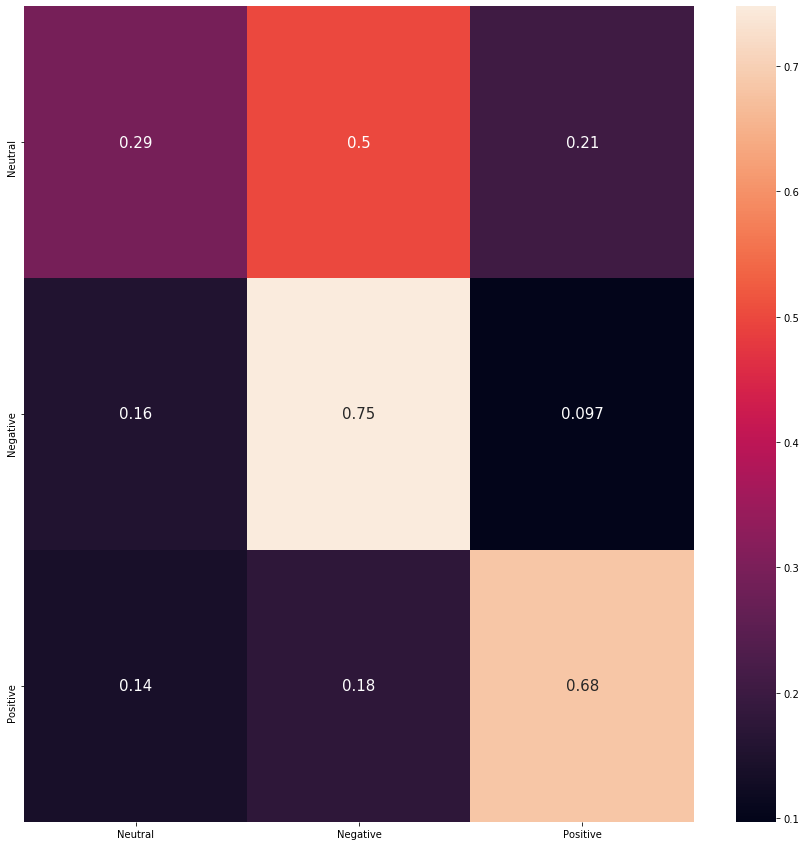

In [130]:
import seaborn as sns
conf_matrix = pd.DataFrame(matrix, index = ['Neutral','Negative','Positive'],columns = ['Neutral','Negative','Positive'])
#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

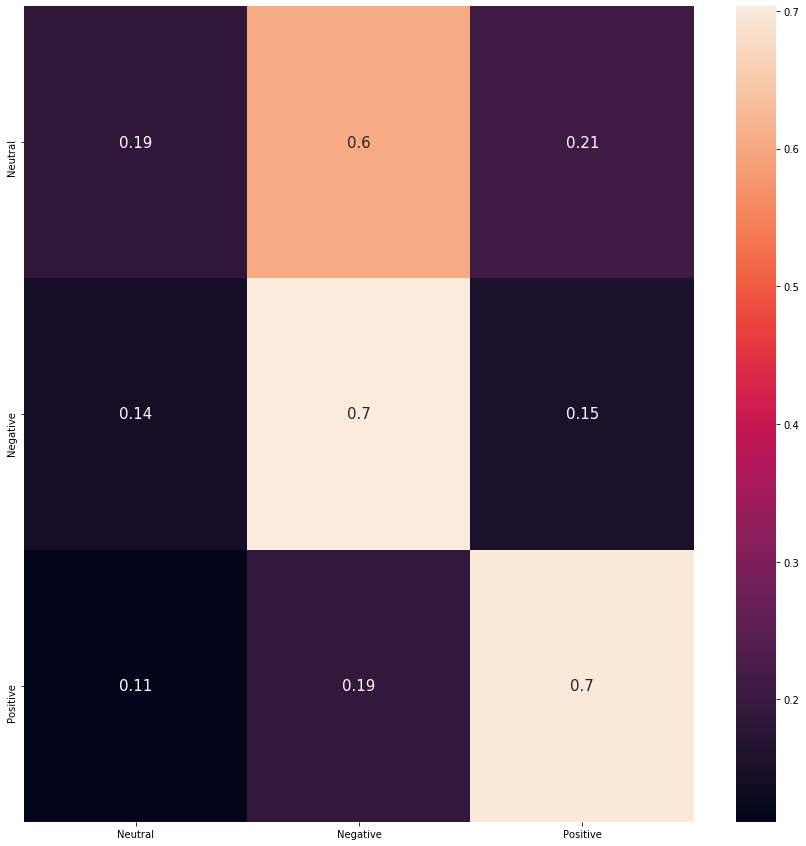

In [131]:
#Extra for Zalando
matrixZala = confusion_matrix(y_testZala.argmax(axis=1), np.around(predictionsZala, decimals=0).argmax(axis=1))


conf_matrixZala = pd.DataFrame(matrixZala, index = ['Neutral','Negative','Positive'],columns = ['Neutral','Negative','Positive'])
#Normalizing
conf_matrixZala = conf_matrixZala.astype('float') / conf_matrixZala.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
sns.heatmap(conf_matrixZala, annot=True, annot_kws={"size": 15})

In [132]:
sentiment = ['Neutral','Negative','Positive']

In [133]:
sequence = tokenizer.texts_to_sequences(['this experience has been the worst , want my money back'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(model.predict(test), decimals=0).argmax(axis=1)[0]]


'Negative'

In [134]:
print(np.around(model.predict(test), decimals=0).argmax(axis=1)[0])

1


## Use Model

In [135]:
asos_sent_reviews['predicted_sentiment'] = ''


for i in range(0, len(asos_sent_reviews)):
    sentiment = ['Neutral','Negative','Positive']
    sequence = tokenizer.texts_to_sequences([asos_sent_reviews['content'][i]])
    test = pad_sequences(sequence, maxlen=max_len)
    asos_sent_reviews['predicted_sentiment'][i] = sentiment[np.around(model.predict(test), decimals=0).argmax(axis=1)[0]]


In [136]:
asos_sent_reviews

content sentiment  \
0    Doesn't let me order anything just keeps telli...  negative   
1    Charged me the money and said they shipped the...  negative   
2    I used to enjoy shopping on this app. It's unf...  negative   
3    The quality of their cloths is amazing. Howeve...  negative   
4    Its all good till you place the order but a co...  negative   
..                                                 ...       ...   
945                                          Great app  positive   
946  Trustworthy, easy to use, real to picture, nic...  positive   
947  Love ASOS it has a mixture of everything you w...  positive   
948                      easy and super understandable  positive   
949  Love Asos Good variety and selection for us Cu...  positive   

    predicted_sentiment  
0               Neutral  
1              Negative  
2              Negative  
3              Negative  
4              Negative  
..                  ...  
945            Negative  
946             Neutral  
947            Negative  
948            Positive  
949            Positive  

[950 rows x 3 columns]

In [137]:
asos_sent_reviews.groupby('predicted_sentiment').nunique()

content  sentiment  predicted_sentiment
predicted_sentiment                                         
Negative                 554          3                    1
Neutral                  143          3                    1
Positive                 221          3                    1

In [138]:
asos_sent_reviews.groupby('sentiment').nunique()

content  sentiment  predicted_sentiment
sentiment                                         
negative       400          1                    3
neutral        144          1                    3
positive       379          1                    3

In [139]:
zalando_sent_reviews['predicted_sentiment'] = ''


for i in range(950, (len(zalando_sent_reviews)+len(asos_sent_reviews))):
    sentiment = ['Neutral','Negative','Positive']
    sequence = tokenizer.texts_to_sequences([zalando_sent_reviews['content'][i]])
    test = pad_sequences(sequence, maxlen=max_len)
    zalando_sent_reviews['predicted_sentiment'][i] = sentiment[np.around(modelZala.predict(test), decimals=0).argmax(axis=1)[0]]


In [140]:
zalando_sent_reviews

content sentiment  \
950   I set Zlando zero because he sends the bills m...  negative   
951                                              Sucker  negative   
952   Non mi permette di pagare. Ho provato a svuota...  negative   
953   I have cancelled my order to reoder the size d...  negative   
954                                You charged me twice  negative   
...                                                 ...       ...   
1876                                Very nice to access  positive   
1877                       Super great app , works fast  positive   
1878                                         Very goood  positive   
1879                                         Super god!  positive   
1880  Its a very good experience with this app. The ...  positive   

     predicted_sentiment  
950             Negative  
951              Neutral  
952             Negative  
953             Negative  
954             Negative  
...                  ...  
1876            Positive  
1877            Positive  
1878            Positive  
1879            Positive  
1880            Positive  

[931 rows x 3 columns]

In [141]:
zalando_sent_reviews.groupby('predicted_sentiment').nunique()

content  sentiment  predicted_sentiment
predicted_sentiment                                         
Negative                 393          3                    1
Neutral                  129          3                    1
Positive                 351          3                    1

In [142]:
zalando_sent_reviews.groupby('sentiment').nunique()

content  sentiment  predicted_sentiment
sentiment                                         
negative       381          1                    3
neutral        145          1                    3
positive       353          1                    3